In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from scipy import stats as st
import statistics
import statsmodels.api as sm 
from statsmodels.formula.api import ols 

In [2]:
# loading political interest data set:

path = "Political Interest.csv"

df = pl.read_csv(path)

genders = list(
    set(
        df.select("gender").to_series().to_list()
    )
)

educ_level = list(
    set(
        df.select("education_level").to_series().to_list()
    )
)

print(f"The Genders are: {genders}\n")
print(f"The education levels are: {educ_level}\n")

# printing first 10 rows of the dataset
df.head(10)



The Genders are: [1, 2]

The education levels are: [1, 2, 3]



gender,education_level,political_interest
i64,i64,f64
1,1,38.0
1,1,39.0
1,1,35.0
1,1,38.0
1,1,41.0
1,1,40.0
1,1,36.0
1,1,37.0
1,1,33.0


In [3]:
# setting data of each group to a numpy array

# first gender
gen1_ed1 = df.filter( gender = 1, education_level=1 ).select("political_interest").to_series().to_numpy()
gen1_ed2 = df.filter( gender = 1, education_level=2 ).select("political_interest").to_series().to_numpy()
gen1_ed3 = df.filter( gender = 1, education_level=3 ).select("political_interest").to_series().to_numpy()

# second gender

gen2_ed1 = df.filter( gender = 2, education_level=1 ).select("political_interest").to_series().to_numpy()
gen2_ed2 = df.filter( gender = 2, education_level=2 ).select("political_interest").to_series().to_numpy()
gen2_ed3 = df.filter( gender = 2, education_level=3 ).select("political_interest").to_series().to_numpy()

# Assumptions

after looking at our data, we decided to conduct a two-way Anova, with a significance level of 0.05

## First assumption
is that there is a continuous dependent variable. This is provided by the variable political interest

## Second assumption
is that there are 2 independent categorical variables, each consisting of at least two groups. This is provided by the gender variable (with 2 groups), and the education level variable (with 3 groups)

## Third assumption
is that the responses/data are independent, with no participant being in more than one group. We can assume that this is true

# The fourth assumption 
is that there are no extreme outliers in any of our joined groups, we can see this with a violin plot and a boxplot

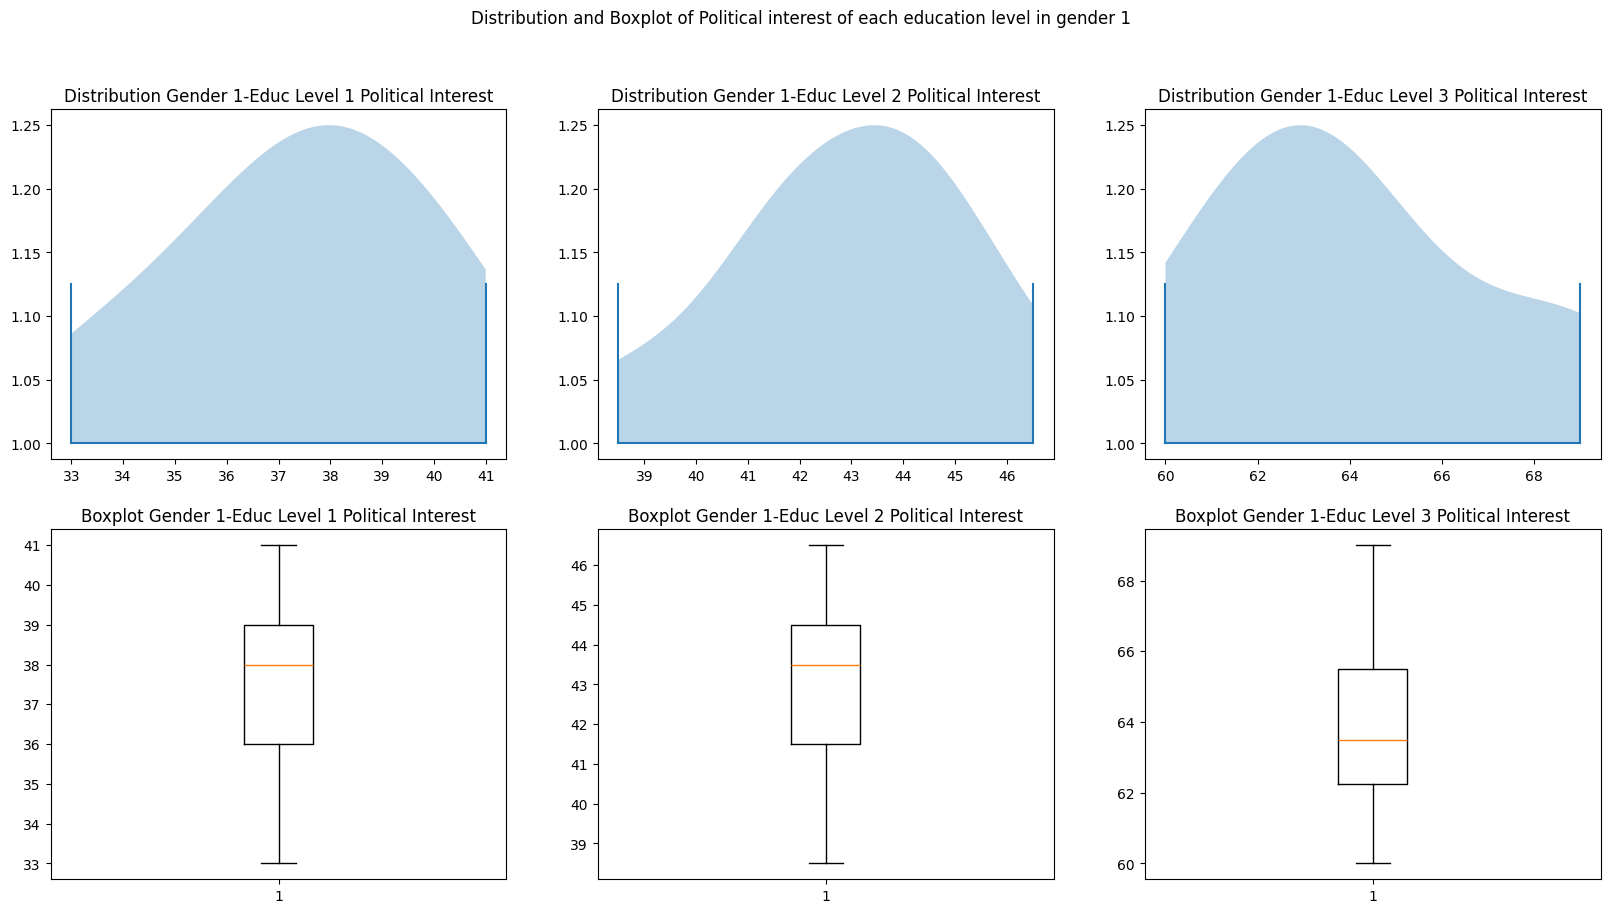

In [4]:
# Checking gender 1 data

fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.suptitle("Distribution and Boxplot of Political interest of each education level in gender 1")

axs[0, 0].violinplot(gen1_ed1, side='high', vert=False)
axs[0, 0].set_title("Distribution Gender 1-Educ Level 1 Political Interest")

axs[0, 1].violinplot(gen1_ed2, side='high', vert=False)
axs[0, 1].set_title("Distribution Gender 1-Educ Level 2 Political Interest")

axs[0, 2].violinplot(gen1_ed3, side='high', vert=False)
axs[0, 2].set_title("Distribution Gender 1-Educ Level 3 Political Interest")

axs[1, 0].boxplot(gen1_ed1)
axs[1, 0].set_title("Boxplot Gender 1-Educ Level 1 Political Interest")

axs[1, 1].boxplot(gen1_ed2)
axs[1, 1].set_title("Boxplot Gender 1-Educ Level 2 Political Interest")

axs[1, 2].boxplot(gen1_ed3)
axs[1, 2].set_title("Boxplot Gender 1-Educ Level 3 Political Interest")

plt.show()

We can see that, across gender 1, there are no outliers in the political interest in each education level. We can also see that their distributions are skewed slightly 

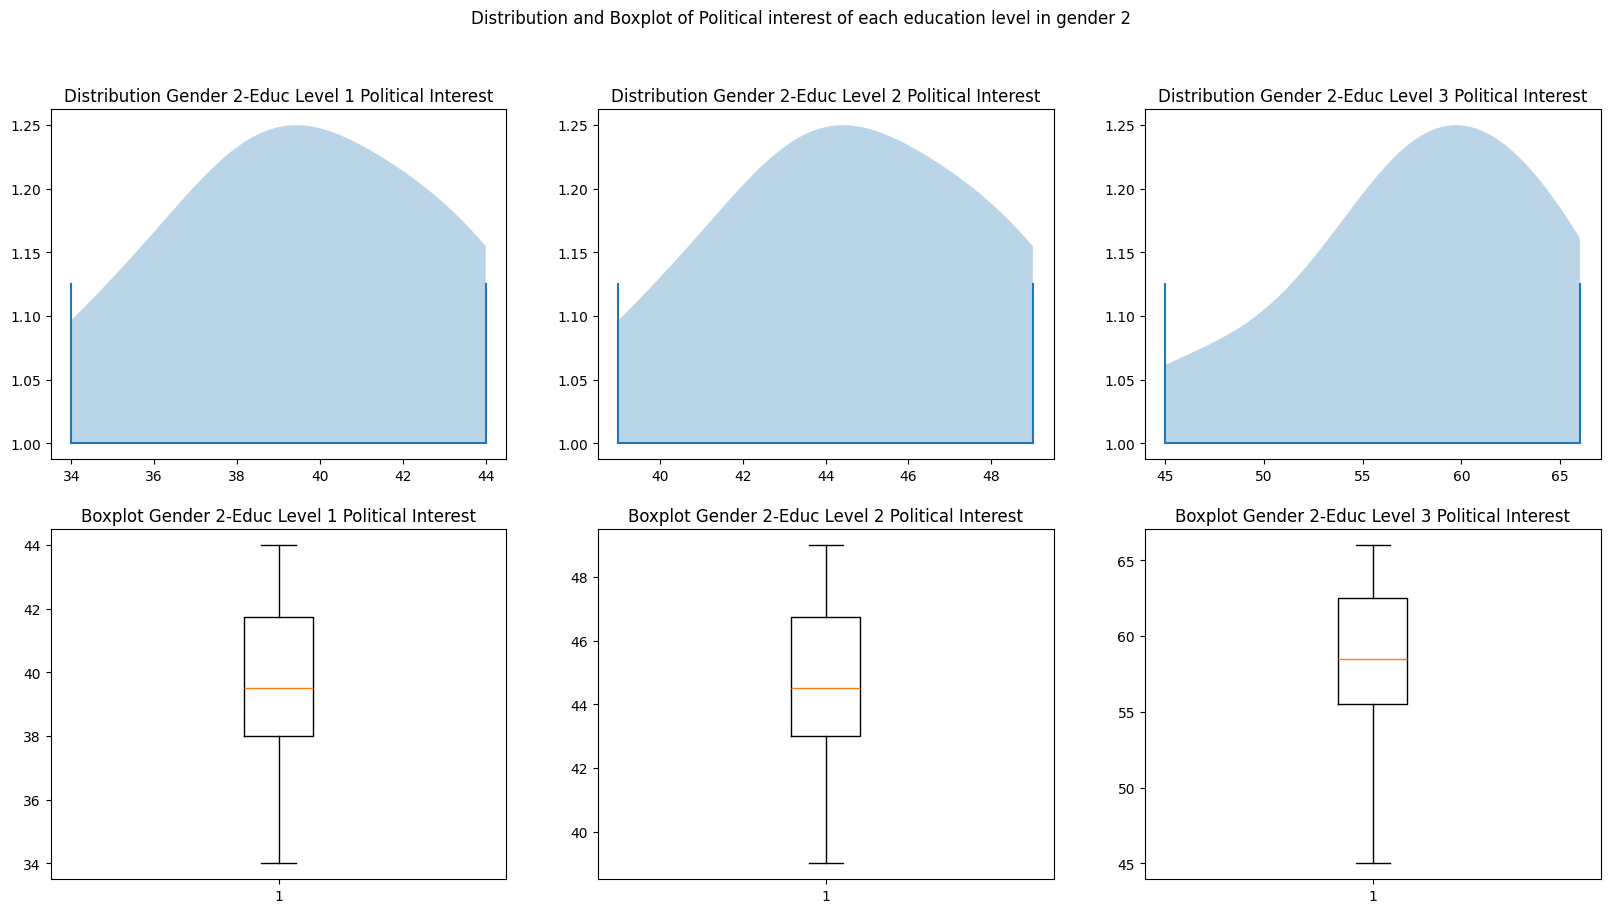

In [5]:
# Checking gender 2 data

fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.suptitle("Distribution and Boxplot of Political interest of each education level in gender 2")

axs[0, 0].violinplot(gen2_ed1, side='high', vert=False)
axs[0, 0].set_title("Distribution Gender 2-Educ Level 1 Political Interest")

axs[0, 1].violinplot(gen2_ed2, side='high', vert=False)
axs[0, 1].set_title("Distribution Gender 2-Educ Level 2 Political Interest")

axs[0, 2].violinplot(gen2_ed3, side='high', vert=False)
axs[0, 2].set_title("Distribution Gender 2-Educ Level 3 Political Interest")

axs[1, 0].boxplot(gen2_ed1)
axs[1, 0].set_title("Boxplot Gender 2-Educ Level 1 Political Interest")

axs[1, 1].boxplot(gen2_ed2)
axs[1, 1].set_title("Boxplot Gender 2-Educ Level 2 Political Interest")

axs[1, 2].boxplot(gen2_ed3)
axs[1, 2].set_title("Boxplot Gender 2-Educ Level 3 Political Interest")

plt.show()

We can see from the plots that there are no outliers across the education levels of gender 2. We can also see that those in gender 2 and education level 3 are skewed to the right, while the other 2 education level are slightly symmetrical, but are otherwise slightly skewed to the right as well.

## Thus, assumption 4 is met.

## Assumption 5
is that the dependent variable should be normally distributed across all groups. We can test this using the shapiro-wilk test

In [6]:
# Shapiro-Wilk test for normality

for gender_num in genders:
    if gender_num == 1:
        for idx_educ, data in enumerate([gen1_ed1, gen1_ed2, gen1_ed3]):
            test_stat, pval = st.shapiro(data)
            print(f"The shapiro test statistic for gender {gender_num} and education level {educ_level[idx_educ]} is {test_stat} and its p value is {pval} ")

    if gender_num == 2:
        for idx_educ, data in enumerate([gen2_ed1, gen2_ed2, gen2_ed3]):
            test_stat, pval = st.shapiro(data)
            print(f"The shapiro test statistic for gender {gender_num} and education level {educ_level[idx_educ]} is {test_stat} and its p value is {pval} ")

    print()

The shapiro test statistic for gender 1 and education level 1 is 0.9813390134795488 and its p value is 0.9708070387442351 
The shapiro test statistic for gender 1 and education level 2 is 0.9565019530188729 and its p value is 0.7610940646763964 
The shapiro test statistic for gender 1 and education level 3 is 0.9153413250787927 and its p value is 0.31973071050675683 

The shapiro test statistic for gender 2 and education level 1 is 0.9629531035675938 and its p value is 0.8189494017694237 
The shapiro test statistic for gender 2 and education level 2 is 0.9629531035675938 and its p value is 0.8189494017694237 
The shapiro test statistic for gender 2 and education level 3 is 0.9499896853336705 and its p value is 0.6683785084587048 



All Shapiro-Wilk Test p-values are above 0.05, therefore our data is normal, and assumption 5 is achieved.

## Assumption 6
is that there is a homogeneity in variances between the combination of groups between the two independent variables. We can do levene's test for this.

In [7]:
# levene's test

lev_stat, levpval = st.levene(gen1_ed1, gen1_ed2, gen1_ed3, gen2_ed1, gen2_ed2, gen2_ed3)
print(f"The Levene test statistic for political interest across the three groups are {lev_stat} and its p value is {levpval} ")

The Levene test statistic for political interest across the three groups are 2.20536094868572 and its p value is 0.06764955900365915 


The p-value (0.68) of the levene's test is greater than 0.05, therefore there is homogeneity among the combinations of groups of categorical variables.

therefore, assumption 6 is met.

All the assumptions are met, therefore we can continue to our two-way ANOVA.

Our hypothesis are:

$H_0 = $There is no significant interaction effect on political interest between gender and education level.

$H_1 = $There is a significant interaction effect on political interest between gender and education level.

In [8]:
df.group_by("gender").agg(mean_pol_interest = pl.col("political_interest").mean(), std_pol_interest =  pl.col("political_interest").std())


gender,mean_pol_interest,std_pol_interest
i64,f64,f64
1,48.732143,12.15447
2,47.4,9.05767


In [9]:
df.group_by("education_level").agg(mean_pol_interest = pl.col("political_interest").mean(), std_pol_interest =  pl.col("political_interest").std())

education_level,mean_pol_interest,std_pol_interest
i64,f64,f64
2,43.815789,2.916479
1,38.578947,3.060788
3,61.05,5.835238


In [10]:
print("The mean of Gender 1 and educational level 1 is", gen1_ed1.mean(), ", with a standard deviation of ", gen1_ed1.std())
print("The mean of Gender 1 and educational level 2 is", gen1_ed2.mean(), ", with a standard deviation of ", gen1_ed2.std())
print("The mean of Gender 1 and educational level 3 is", gen1_ed3.mean(), ", with a standard deviation of ", gen1_ed3.std())
print("The mean of Gender 2 and educational level 1 is", gen2_ed1.mean(), ", with a standard deviation of ", gen2_ed1.std())
print("The mean of Gender 2 and educational level 2 is", gen2_ed2.mean(), ", with a standard deviation of ", gen2_ed2.std())
print("The mean of Gender 2 and educational level 3 is", gen2_ed3.mean(), ", with a standard deviation of ", gen2_ed3.std())

The mean of Gender 1 and educational level 1 is 37.44444444444444 , with a standard deviation of  2.3622546250521443
The mean of Gender 1 and educational level 2 is 42.94444444444444 , with a standard deviation of  2.2040927138752635
The mean of Gender 1 and educational level 3 is 64.1 , with a standard deviation of  2.9137604568666933
The mean of Gender 2 and educational level 1 is 39.6 , with a standard deviation of  3.104834939252005
The mean of Gender 2 and educational level 2 is 44.6 , with a standard deviation of  3.104834939252005
The mean of Gender 2 and educational level 3 is 58.0 , with a standard deviation of  6.131883886702357


In [11]:
model = ols('political_interest ~ C(gender) + C(education_level) + C(gender):C(education_level)' , 
            data=df.to_pandas()).fit() 
result = sm.stats.anova_lm(model, type=2) 

print(result) 

                                df       sum_sq      mean_sq           F  \
C(gender)                      1.0    25.701170    25.701170    1.787562   
C(education_level)             2.0  5409.958966  2704.979483  188.136131   
C(gender):C(education_level)   2.0   210.337661   105.168830    7.314679   
Residual                      52.0   747.644444    14.377778         NaN   

                                    PR(>F)  
C(gender)                     1.870433e-01  
C(education_level)            1.553704e-24  
C(gender):C(education_level)  1.587744e-03  
Residual                               NaN  


In [12]:
print("Post-Hoc Analysis")
print("Gender 1 - Education Level 1")
t_stat_g1e1_g1e2, tpval_g1e1_g1e2 = st.ttest_ind(gen1_ed1, gen1_ed2)
print(f"The Independent samples t-test test statistic between gender 1 - education level 1 and gender 1 - education level 2 is {t_stat_g1e1_g1e2} and its p value is {tpval_g1e1_g1e2} ", end="\n\n")

t_stat_g1e1_g1e3, tpval_g1e1_g1e3 = st.ttest_ind(gen1_ed1, gen1_ed3)
print(f"The Independent samples t-test test statistic between gender 1 - education level 1 and gender 1 - education level 3 is {t_stat_g1e1_g1e3} and its p value is {tpval_g1e1_g1e3} ", end="\n\n")

t_stat_g1e1_g2e1, tpval_g1e1_g2e1 = st.ttest_ind(gen1_ed1, gen2_ed1)
print(f"The Independent samples t-test test statistic between gender 1 - education level 1 and gender 2 - education level 1 is {t_stat_g1e1_g2e1} and its p value is {tpval_g1e1_g2e1} ", end="\n\n")

t_stat_g1e1_g2e2, tpval_g1e1_g2e2 = st.ttest_ind(gen1_ed1, gen2_ed2)
print(f"The Independent samples t-test test statistic between gender 1 - education level 1 and gender 2 - education level 2 is {t_stat_g1e1_g2e2} and its p value is {tpval_g1e1_g2e2} ", end="\n\n")

t_stat_g1e1_g2e3, tpval_g1e1_g2e3 = st.ttest_ind(gen1_ed1, gen2_ed3)
print(f"The Independent samples t-test test statistic between gender 1 - education level 1 and gender 2 - education level 3 is {t_stat_g1e1_g2e3} and its p value is {tpval_g1e1_g2e3} ", end="\n\n")

print("Gender 1 - Education Level 2")
t_stat_g1e2_g1e3, tpval_g1e2_g1e3 = st.ttest_ind(gen1_ed2, gen1_ed3)
print(f"The Independent samples t-test test statistic between gender 1 - education level 2 and gender 1 - education level 3 is {t_stat_g1e2_g1e3} and its p value is {tpval_g1e2_g1e3} ", end="\n\n")

t_stat_g1e2_g2e1, tpval_g1e2_g2e1 = st.ttest_ind(gen1_ed2, gen2_ed1)
print(f"The Independent samples t-test test statistic between gender 1 - education level 2 and gender 2 - education level 1 is {t_stat_g1e2_g2e1} and its p value is {tpval_g1e2_g2e1} ", end="\n\n")

t_stat_g1e2_g2e2, tpval_g1e2_g2e2 = st.ttest_ind(gen1_ed2, gen2_ed2)
print(f"The Independent samples t-test test statistic between gender 1 - education level 2 and gender 2 - education level 2 is {t_stat_g1e2_g2e2} and its p value is {tpval_g1e2_g2e2} ", end="\n\n")

t_stat_g1e2_g2e3, tpval_g1e2_g2e3 = st.ttest_ind(gen1_ed2, gen2_ed3)
print(f"The Independent samples t-test test statistic between gender 1 - education level 2 and gender 2 - education level 3 is {t_stat_g1e2_g2e3} and its p value is {tpval_g1e2_g2e3} ", end="\n\n")

print("Gender 1 - Education Level 3")
t_stat_g1e3_g2e1, tpval_g1e3_g2e1 = st.ttest_ind(gen1_ed3, gen2_ed1)
print(f"The Independent samples t-test test statistic between gender 1 - education level 3 and gender 2 - education level 1 is {t_stat_g1e3_g2e1} and its p value is {tpval_g1e3_g2e1} ", end="\n\n")

t_stat_g1e3_g2e2, tpval_g1e3_g2e2 = st.ttest_ind(gen1_ed3, gen2_ed2)
print(f"The Independent samples t-test test statistic between gender 1 - education level 3 and gender 2 - education level 2 is {t_stat_g1e3_g2e2} and its p value is {tpval_g1e3_g2e2} ", end="\n\n")

t_stat_g1e3_g2e3, tpval_g1e3_g2e3 = st.ttest_ind(gen1_ed3, gen2_ed3)
print(f"The Independent samples t-test test statistic between gender 1 - education level 3 and gender 2 - education level 3 is {t_stat_g1e3_g2e3} and its p value is {tpval_g1e3_g2e3} ", end="\n\n")

print("Gender 2 - Education Level 1")
t_stat_g2e1_g2e2, tpval_g2e1_g2e2 = st.ttest_ind(gen2_ed1, gen2_ed2)
print(f"The Independent samples t-test test statistic between gender 2 - education level 1 and gender 2 - education level 2 is {t_stat_g2e1_g2e2} and its p value is {tpval_g2e1_g2e2} ", end="\n\n")

t_stat_g2e1_g2e3, tpval_g2e1_g2e3 = st.ttest_ind(gen2_ed1, gen2_ed3)
print(f"The Independent samples t-test test statistic between gender 2 - education level 1 and gender 2 - education level 3 is {t_stat_g2e1_g2e3} and its p value is {tpval_g2e1_g2e3} ", end="\n\n")

print("Gender 2 - Education Level 2")
t_stat_g2e2_g2e3, tpval_g2e2_g2e3 = st.ttest_ind(gen2_ed2, gen2_ed3)
print(f"The Independent samples t-test test statistic between gender 2 - education level 2 and gender 2 - education level 3 is {t_stat_g2e2_g2e3} and its p value is {tpval_g2e2_g2e3} ", end="\n\n")

Post-Hoc Analysis
Gender 1 - Education Level 1
The Independent samples t-test test statistic between gender 1 - education level 1 and gender 1 - education level 2 is -4.814967792549396 and its p value is 0.0001904285464908674 

The Independent samples t-test test statistic between gender 1 - education level 1 and gender 1 - education level 3 is -20.57753096770845 and its p value is 1.8784034069279209e-13 

The Independent samples t-test test statistic between gender 1 - education level 1 and gender 2 - education level 1 is -1.5974535422834677 and its p value is 0.12858453967504432 

The Independent samples t-test test statistic between gender 1 - education level 1 and gender 2 - education level 2 is -5.302887016652331 and its p value is 5.843667781715495e-05 

The Independent samples t-test test statistic between gender 1 - education level 1 and gender 2 - education level 3 is -8.934702356940809 and its p value is 7.857351404375597e-08 

Gender 1 - Education Level 2
The Independent sam

A two-way Analysis of Variance showed that gender had an unsignificant effect on the political interest of the respondents, F = 1.79, p = 0.187 > 0.05. However, the education level proved to be very significant, F = 188.14, p = 1.55e-24 < 0.05. An education level of 3 proved to indicate more political interest (M = 61.05, SD = 5.83), followed by an education level of 2 (M = 43.82, SD = 2.92), and lastly an education level of 1 (M = 38.58, SD = 3.06). The interaction effect between gender and educational level was also significant on political interest, F = 7.31, p = 0.00159 < 0.05. 

Post-Hoc Analysis shows that the political interest of Gender 1 - Educational level 1 (M = 37.44, SD = 2.36) is significantly lower than Gender 1 - Educational Level 2 (M = 42.94, SD = 2.2), Gender 1 - Educational Level 3 (M = 64.1, SD = 2.91), Gender 2 - Educational Level 2 (M = 44.6, SD = 3.1), and Gender 2 - Educational Level 3 (M = 58, SD = 6.13). 

It also shows that Gender 1 - Educational Level 2 (M = 42.94, SD = 2.2) is significantly less than Gender 1 - Educational Level 3 (M = 64.1, SD = 2.91), and Gender 2 - Educational Level 3 (M = 58, SD = 6.13), but is majorly greater than Gender 2 - Educational Level 1 ( M = 39.6, SD = 3.1). 

Post Hoc analysis shows Gender 1 - Educational Level 3 (M = 64.1, SD = 2.91) is significantly greater than Gender 2 - Educational Level 1 ( M = 39.6, SD = 3.1), Gender 2 - Educational Level 2 (M = 44.6, SD = 3.1), and Gender 2 - Educational Level 3 (M = 58, SD = 6.13).

It also reveals that Gender 2 - Educational Level 1 ( M = 39.6, SD = 3.1) is significantly less than Gender 2 - Educational Level 2 (M = 44.6, SD = 3.1), and Gender 2 - Educational Level 3 (M = 58, SD = 6.13).

Gender 2 - Educational Level 2 (M = 44.6, SD = 3.1) is also shown to be significantly less than Gender 2 - Educational Level 3 (M = 58, SD = 6.13).

To summarize, the hypothesis testing shows that the respondents in the 3rd Educational level showed a significantly higher political interest than other educational levels, and that Gender 1 respondents that are in the 3rd educational level showed the highest political interest among the groups, and although there was no significant difference in political interest when comparing the genders, this seems to suggest that, as educational level rises, the difference between genders become statistically significant. 